<a href="https://colab.research.google.com/github/ADerudder/Matematica/blob/main/Rotor%2C_divergencia_y_campos_conservativos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rotor, divergencia y campos conservativos 

Este programa tiene la finalidad de facilitar las labores a la hora de trabajar con campos vectoriales.


### Uso del programa

Para utilizarlo solo basta con cargarle nuestro campo vectorial y correrlo, el programa nos devolvera el rotor , la divergencia, nos dira si nuestro campo es conservativo, y en caso de serlo, nos facilitara hallar la funcion escalar asociada.

In [ ]:
#Importamos Sympy

from sympy import init_session
init_session( use_latex = True)

IPython console for SymPy 1.6.1 (Python 3.8.3-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.6.1/



Nuestro campo F tiene la forma: 

$$ \vec{F}=(F_{1}(x,y,z) \ , \ F_{2}(x,y,z) \ , \ F_{3}(x,y,z)) $$

A continuacion se deja la parte de codigo a completar.

#### Observaciones

Estamos utilizando la libreria Sympy, con lo cual:
* Las funciones trigonometricas van sin np.( numpy ), ej.: sin(x)
* Los numeros como e y pi ya estan cargados, no se debe utilizar el np.

In [ ]:
a,F,t=symbols('a,F,t')
x,y,z= symbols("x,y,z",real="True")
################################
#Completar con las componentes del campo

F1=-x/((x**2 +y**2 +z**2)**(3/2)) * sin(x)

F2= -y/((x**2 +y**2 +z**2)**(3/2))

F3= -z/((x**2 +y**2 +z**2)**(3/2))

########################
F=(F1 ,F2 ,F3)



#####  *Chequear si el campo ingresado es correcto*

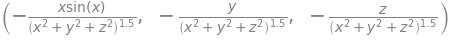

In [ ]:
F

##### Alternativamente puede expresarse como: 

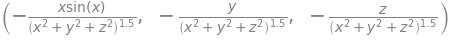

In [ ]:
simplify(F1) , simplify(F2), simplify(F3)

###  *Codigo* 

In [ ]:

GradienteF= (F1.diff(x),F2.diff(y),F3.diff(z))
rot=(F3.diff(y)-F2.diff(z),F1.diff(z)-F3.diff(x),F2.diff(x)-F1.diff(y))
div=(F1.diff(x)+F2.diff(y)+F3.diff(z))

def funcion_escalar(F):
    A=(F3.diff(y)-F2.diff(z),F1.diff(z)-F3.diff(x),F2.diff(x)-F1.diff(y))
    a1= F1.integrate(x)
    a2= F2.integrate(y)
    a3= F3.integrate(z)
    return(a1,a2,a3)
    
#Definimos una funcion que nos calcula la funcion escalar asociada
def funcion(F):
    A= funcion_escalar(F)
    Ñ=(F3.diff(y)-F2.diff(z),F1.diff(z)-F3.diff(x),F2.diff(x)-F1.diff(y)) #Aca establecemos que solo se ejecute si el rotor es 0
    if Ñ==(0,0,0):
        X= A[0]
        Y= A[1]
        Z= A[2]
        #calculamos el resto que depende de x y de xz
        C=X-Y
        M=C.diff(x)
        N=M.integrate(x)
        H=N.diff(z)
        zx=H.integrate(z)
        cx=(X-Y-Z).diff(x)
        CX=cx.integrate(x)

        #Calculamos lo que depende de y, y lo que depende de yz
        D=Y-X
        E=D.diff(y)
        F=E.integrate(y)
        G=F.diff(z)
        yz=G.integrate(z)
        cy=(Y-X-Z).diff(y)
        CY=cy.integrate(y)


        #Calculamos lo que depende de xy
        pe=Y-Z
        pen=pe.diff(y)
        pene=pen.integrate(y)
        a=pene.diff(x)
        xy=a.integrate(x)

        #Calculamos lo que depende de z
        cz= (Z-X-Y).diff(z)
        CZ= cz.integrate(z)
        #Calculamos el valor de la funcion
        funcion=zx+yz+xy+CY+CX+CZ
        return(funcion)
  



### Rotor 

$$ Rotor\ de \ F= \nabla \ x \ F = \ (\ \frac{\partial F_{3}}{\partial y}-\frac{\partial F_{2}}{\partial z} \ ,\ \frac{\partial F_{1}}{\partial z}-\frac{\partial F_{3}}{\partial x} \ ,\ \frac{\partial F_{2}}{\partial x}-\frac{\partial F_{1}}{\partial y} \ ): $$

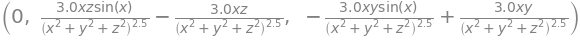

In [ ]:
rot

##### Alternativamente puede expresarse como: 


In [ ]:
simplify(rot[0]) , simplify(rot[1]), simplify(rot[2])

#### OJO: Revisar el resultado

Puede llegar a ser conservativo si el programa no puede simplificar del todo la expresion. 


## Divergencia 

$$ Divergencia\ de \ F = \ \nabla . F = \frac{\partial F_{1}}{\partial x} \ + \ \frac{\partial F_{2}}{\partial y} \ + \  \frac{\partial F_{3}}{\partial z} $$

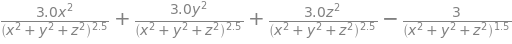

In [ ]:
div

Tambien puede expresarse como :

In [ ]:
simplify(div)

### Función escalar asociada

Si el rotor dio (0,0,0) su campo es conservativo y probablemente quiera conocer la funcion escalar f tal que 

$$ F= \nabla f$$

A continuacion f:

In [ ]:
funcion_escalar(F)

Cabe destacar que para obtener efectivamente la funcion escalar f, se debe analizar coordenda a coordenada y agregar los términos constantes en relacion a la variable.
Si el campo no es conservativo no nos devolvera ninguna f.

### Experimental

Es posible que la funcion escalar f sea :

In [ ]:
funcion(F)

*No se confie al 100% de este último resultado* 

In [ ]:
qe=F1.diff(y)

In [ ]:
tt=F2.diff(x)

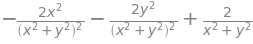

In [ ]:
tt-qe

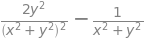

In [ ]:
qe